In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
df = pd.read_csv('Job_Placement_Data.csv')
df.head(20)

,gender,ssc_percentage,ssc_board,hsc_percentage,hsc_board,hsc_subject,degree_percentage,undergrad_degree,work_experience,emp_test_percentage,specialisation,mba_percent,status
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.00,Mkt&HR,58.80,Placed
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.50,Mkt&Fin,66.28,Placed
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.00,Mkt&Fin,57.80,Placed
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.00,Mkt&HR,59.43,Not Placed
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.80,Mkt&Fin,55.50,Placed
5,M,55.00,Others,49.80,Others,Science,67.25,Sci&Tech,Yes,55.00,Mkt&Fin,51.58,Not Placed
6,F,46.00,Others,49.20,Others,Commerce,79.00,Comm&Mgmt,No,74.28,Mkt&Fin,53.29,Not Placed
7,M,82.00,Central,64.00,Central,Science,66.00,Sci&Tech,Yes,67.00,Mkt&Fin,62.14,Placed
8,M,73.00,Central,79.00,Central,Commerce,72.00,Comm&Mgmt,No,91.34,Mkt&Fin,61.29,Placed
9,M,58.00,Central,70.00,Central,Commerce,61.00,Comm&Mgmt,No,54.00,Mkt&Fin,52.21,Not Placed


In [4]:
df.shape

(215, 13)

In [7]:
df.isnull().sum()

gender                 0
ssc_percentage         0
ssc_board              0
hsc_percentage         0
hsc_board              0
hsc_subject            0
degree_percentage      0
undergrad_degree       0
work_experience        0
emp_test_percentage    0
specialisation         0
mba_percent            0
status                 0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               215 non-null    object 
 1   ssc_percentage       215 non-null    float64
 2   ssc_board            215 non-null    object 
 3   hsc_percentage       215 non-null    float64
 4   hsc_board            215 non-null    object 
 5   hsc_subject          215 non-null    object 
 6   degree_percentage    215 non-null    float64
 7   undergrad_degree     215 non-null    object 
 8   work_experience      215 non-null    object 
 9   emp_test_percentage  215 non-null    float64
 10  specialisation       215 non-null    object 
 11  mba_percent          215 non-null    float64
 12  status               215 non-null    object 
dtypes: float64(5), object(8)
memory usage: 22.0+ KB


In [10]:
df.duplicated().sum()

0

In [14]:
cat_cols =  [i for i in df.columns if df.dtypes[i] == 'O']
num_cols =  [i for i in df.columns if df.dtypes[i] != 'O']

In [15]:
cat_cols

['gender',
 'ssc_board',
 'hsc_board',
 'hsc_subject',
 'undergrad_degree',
 'work_experience',
 'specialisation',
 'status']

In [16]:
num_cols

['ssc_percentage',
 'hsc_percentage',
 'degree_percentage',
 'emp_test_percentage',
 'mba_percent']

In [17]:
def univariate_cat(data,x):
    missing=data[x].isnull().sum()
    unique_cnt=data[x].nunique()
    unique_cat=list(data[x].unique())
    f1=pd.DataFrame(data[x].value_counts(dropna=False))
    f1.rename(columns={x:"Count"},inplace=True)
    f2=pd.DataFrame(data[x].value_counts(normalize=True))
    f2.rename(columns={x:"Percentage"},inplace=True)
    f2["Percentage"]=(f2["Percentage"]*100).round(2).astype(str)+" %"
    ff=pd.concat([f1,f2],axis=1)
    print(f"Total missing values : {missing}\n")
    print(f"Total count of unique category : {unique_cnt}\n")
    print(f"Unique categories : \n{unique_cat}")
    print(f"Value count and % : \n{ff}")
    plt.figure(figsize=(10,8))
    sns.countplot(data=data,x=x)
    plt.xticks(rotation=90)
    plt.show()

Total missing values : 0

Total count of unique category : 2

Unique categories : 
['M', 'F']
Value count and % : 
   Count Percentage
M    139    64.65 %
F     76    35.35 %


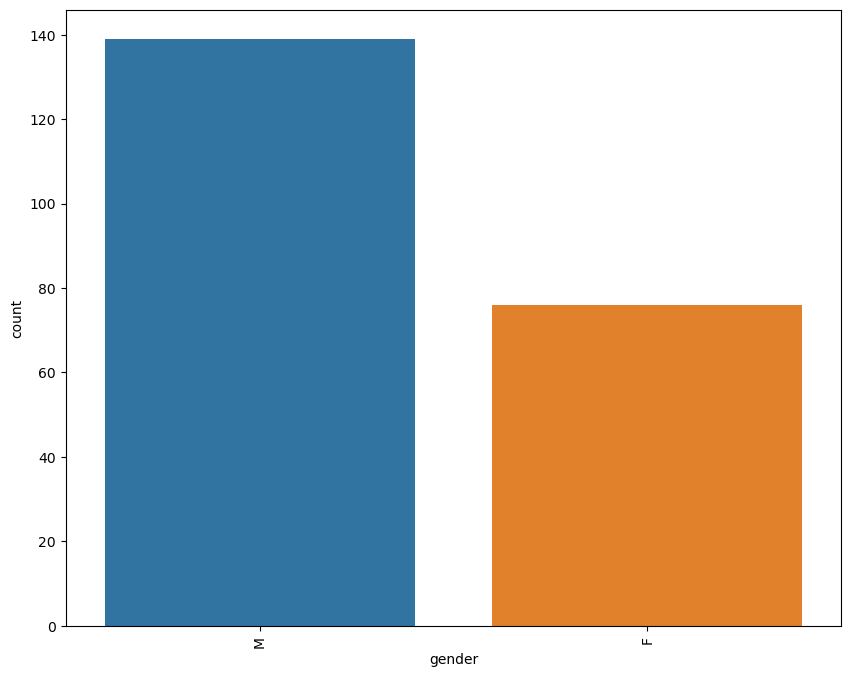

Total missing values : 0

Total count of unique category : 2

Unique categories : 
['Others', 'Central']
Value count and % : 
         Count Percentage
Central    116    53.95 %
Others      99    46.05 %


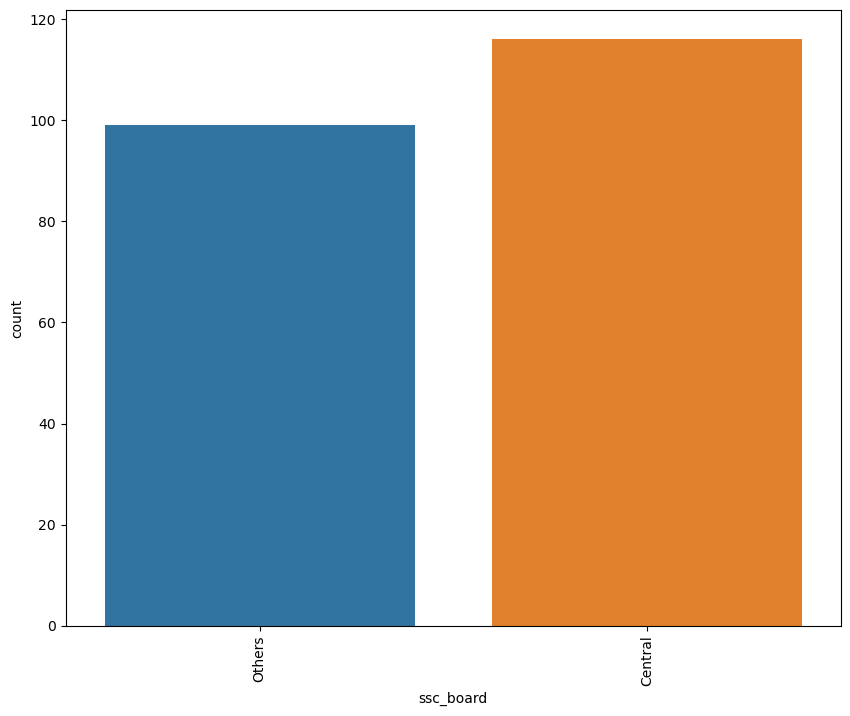

Total missing values : 0

Total count of unique category : 2

Unique categories : 
['Others', 'Central']
Value count and % : 
         Count Percentage
Others     131    60.93 %
Central     84    39.07 %


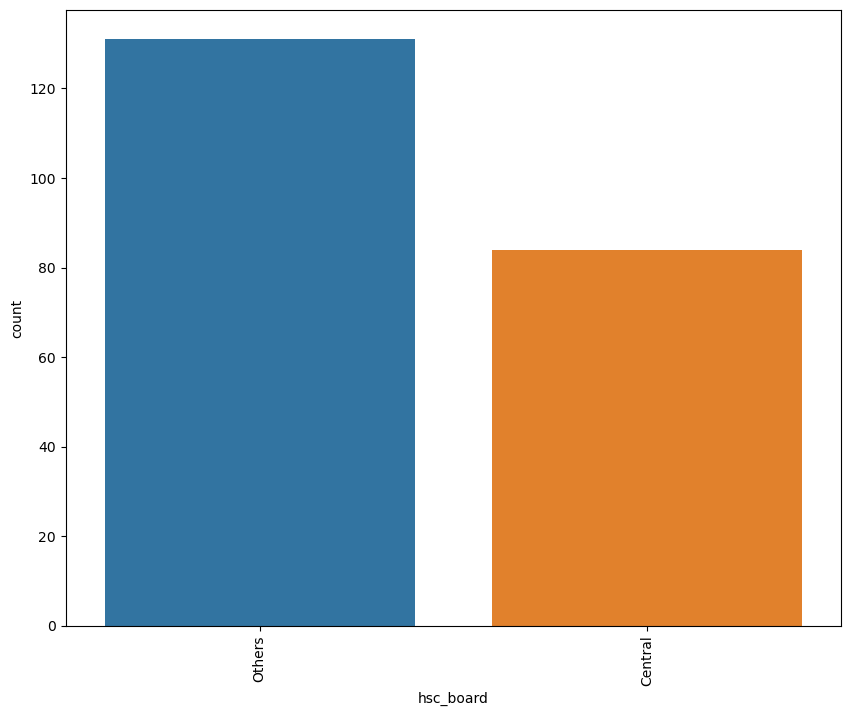

Total missing values : 0

Total count of unique category : 3

Unique categories : 
['Commerce', 'Science', 'Arts']
Value count and % : 
          Count Percentage
Commerce    113    52.56 %
Science      91    42.33 %
Arts         11     5.12 %


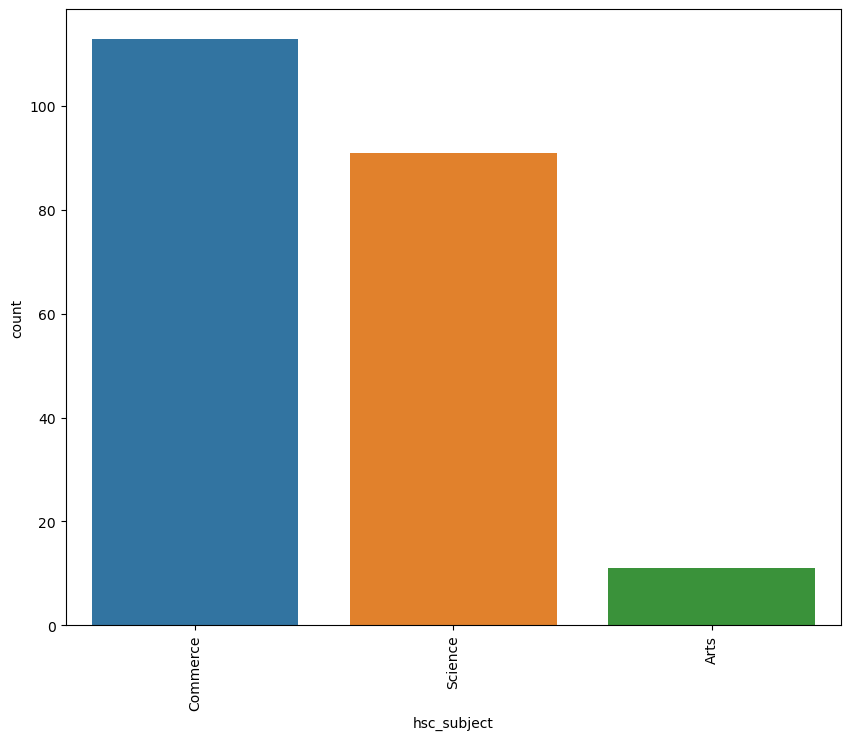

Total missing values : 0

Total count of unique category : 3

Unique categories : 
['Sci&Tech', 'Comm&Mgmt', 'Others']
Value count and % : 
           Count Percentage
Comm&Mgmt    145    67.44 %
Sci&Tech      59    27.44 %
Others        11     5.12 %


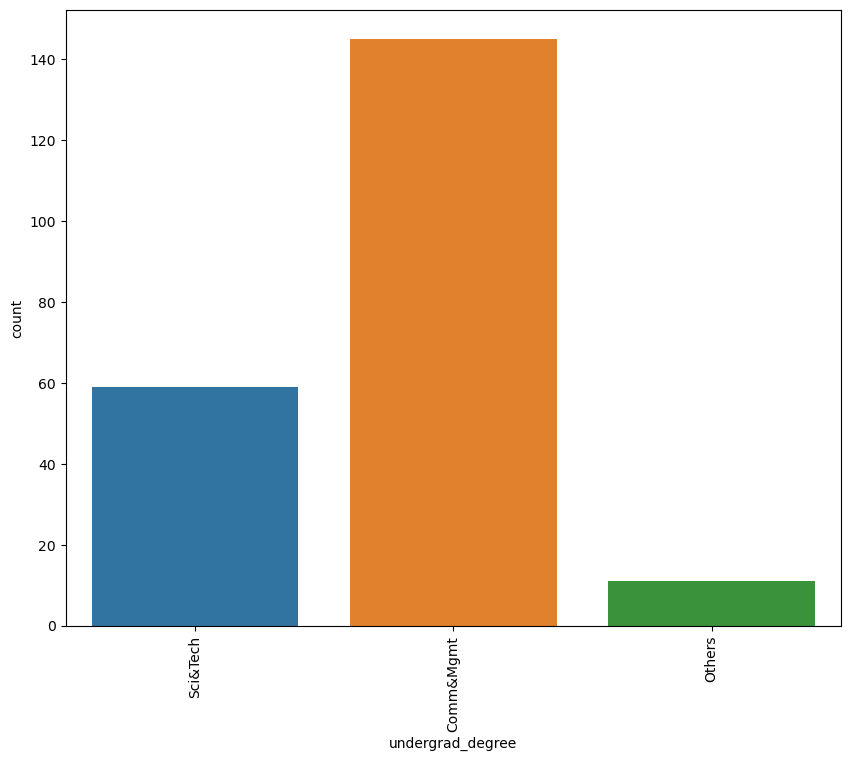

Total missing values : 0

Total count of unique category : 2

Unique categories : 
['No', 'Yes']
Value count and % : 
     Count Percentage
No     141    65.58 %
Yes     74    34.42 %


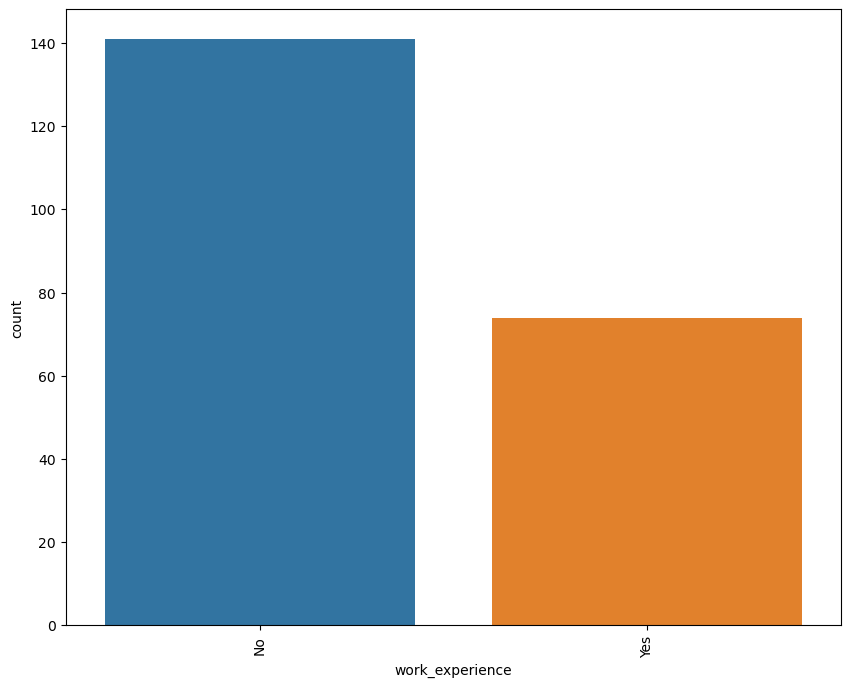

Total missing values : 0

Total count of unique category : 2

Unique categories : 
['Mkt&HR', 'Mkt&Fin']
Value count and % : 
         Count Percentage
Mkt&Fin    120    55.81 %
Mkt&HR      95    44.19 %


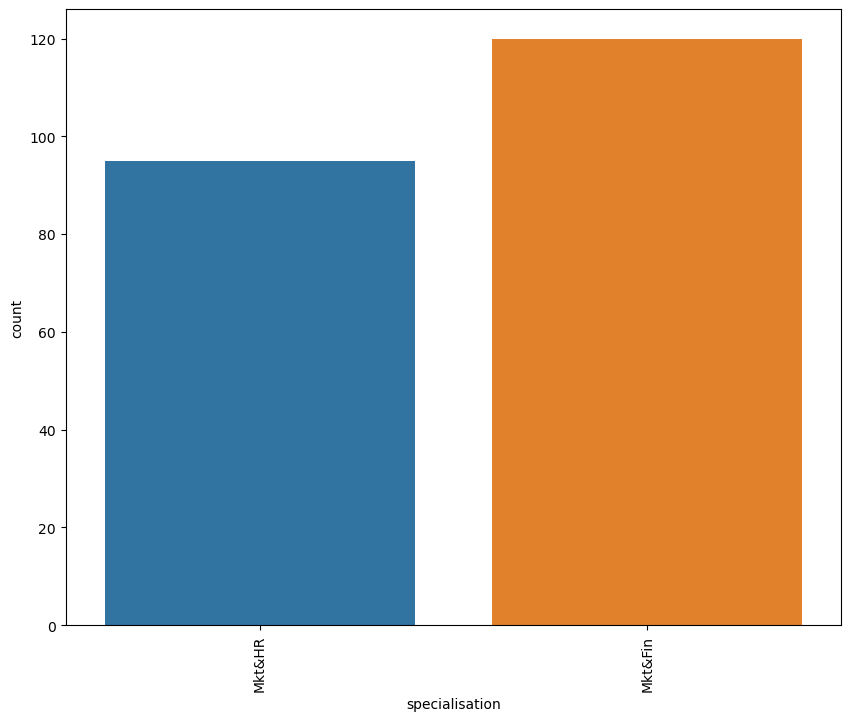

Total missing values : 0

Total count of unique category : 2

Unique categories : 
['Placed', 'Not Placed']
Value count and % : 
            Count Percentage
Placed        148    68.84 %
Not Placed     67    31.16 %


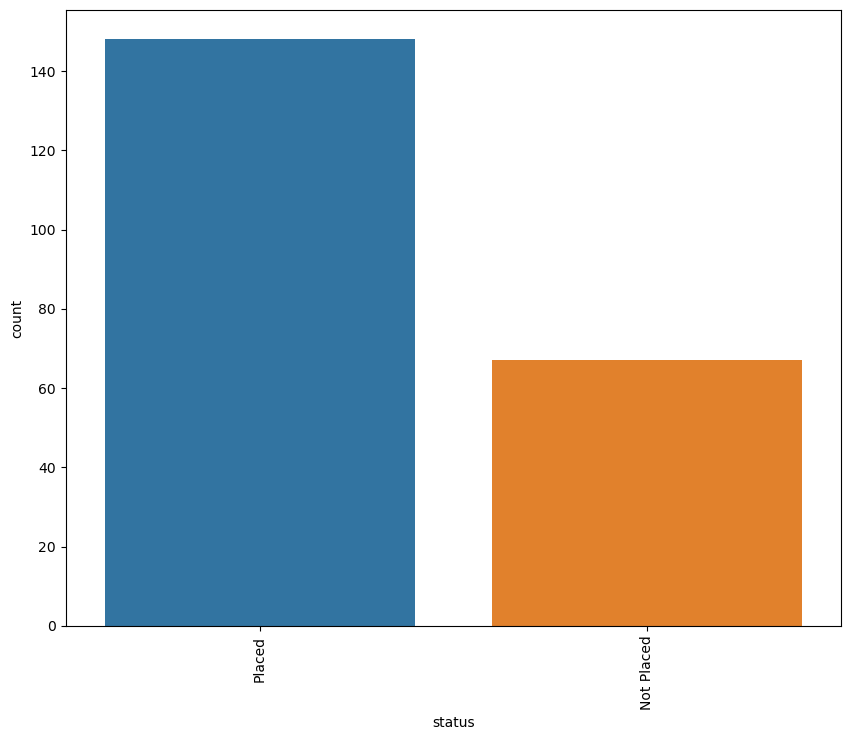

In [19]:
for i in cat_cols:
    univariate_cat(df,i)

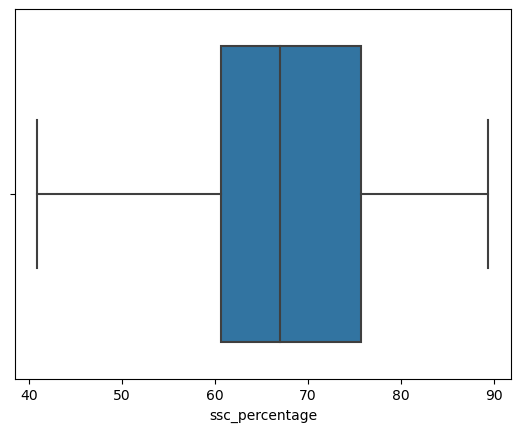

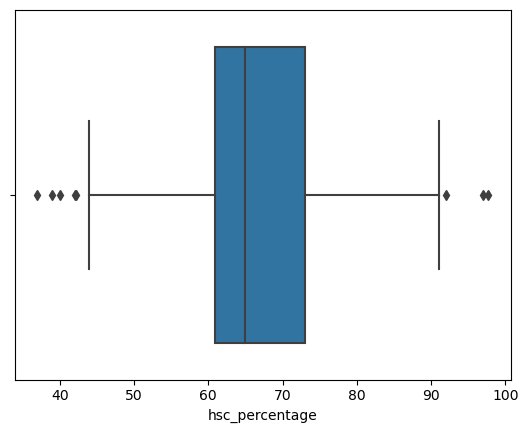

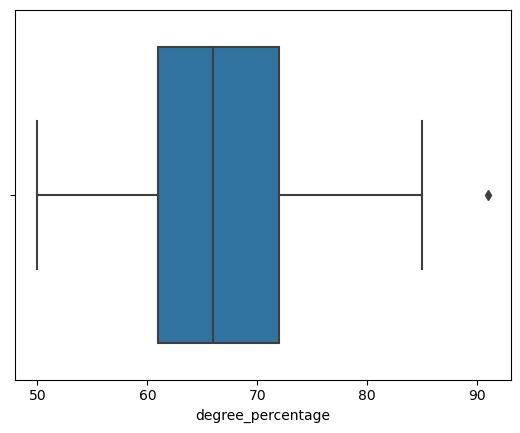

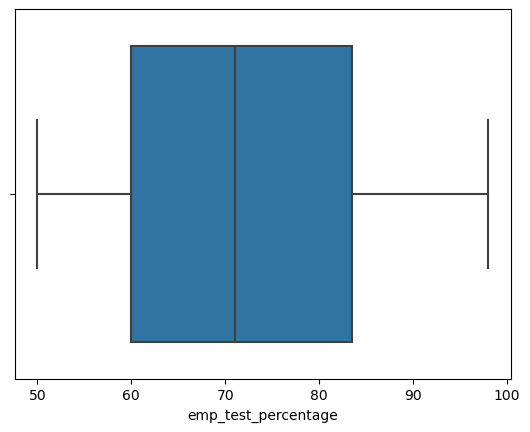

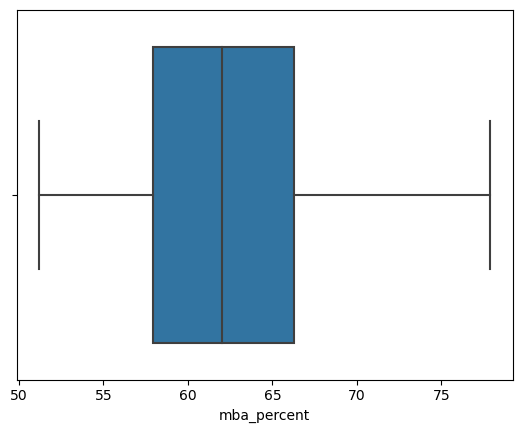

In [20]:
for i in num_cols:
    sns.boxplot(x=df[i])
    plt.show()

In [22]:
x = df.drop('status',axis=1)
y = df['status']
print(type(x))
print(type(y))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [23]:
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

In [24]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(161, 12)
(161,)
(54, 12)
(54,)


In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

def eval_model(ytest,ypred):
    cm = confusion_matrix(ytest,ypred)
    print(cm)
    print(classification_report(ytest,ypred))

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer 
from sklearn.preprocessing import OneHotEncoder,RobustScaler

In [26]:
print(cat_cols)  #[0,2,4,5,7,8,10] (indices to be encoded)
print(num_cols)  #[3] (index to be treated for outlier)

['gender', 'ssc_board', 'hsc_board', 'hsc_subject', 'undergrad_degree', 'work_experience', 'specialisation', 'status']
['ssc_percentage', 'hsc_percentage', 'degree_percentage', 'emp_test_percentage', 'mba_percent']


#### Logistic

In [30]:
step1 = ColumnTransformer(transformers= 
                         [('enc_col',OneHotEncoder(drop='first',sparse=False),[0,2,4,5,7,8,10]),
                         ('robust_scale',RobustScaler(),[3])],remainder='passthrough')
step2 = LogisticRegression(max_iter=1000)
pipe_lr = Pipeline([('step1',step1),('step2',step2)])

pipe_lr.fit(x_train,y_train)
ypred_lr = pipe_lr.predict(x_test)
eval_model(y_test,ypred_lr)

[[ 9  5]
 [ 3 37]]
              precision    recall  f1-score   support

  Not Placed       0.75      0.64      0.69        14
      Placed       0.88      0.93      0.90        40

    accuracy                           0.85        54
   macro avg       0.82      0.78      0.80        54
weighted avg       0.85      0.85      0.85        54



#### KNN

In [32]:
step2 = KNeighborsClassifier()
pipe_knn = Pipeline([('step1',step1),('step2',step2)])

pipe_knn.fit(x_train,y_train)
ypred_knn = pipe_knn.predict(x_test)
eval_model(y_test,ypred_knn)

[[ 6  8]
 [ 4 36]]
              precision    recall  f1-score   support

  Not Placed       0.60      0.43      0.50        14
      Placed       0.82      0.90      0.86        40

    accuracy                           0.78        54
   macro avg       0.71      0.66      0.68        54
weighted avg       0.76      0.78      0.76        54



#### DT

In [33]:
step2 = DecisionTreeClassifier()
pipe_dt = Pipeline([('step1',step1),('step2',step2)])

pipe_dt.fit(x_train,y_train)
ypred_dt = pipe_dt.predict(x_test)
eval_model(y_test,ypred_dt)

[[ 5  9]
 [ 1 39]]
              precision    recall  f1-score   support

  Not Placed       0.83      0.36      0.50        14
      Placed       0.81      0.97      0.89        40

    accuracy                           0.81        54
   macro avg       0.82      0.67      0.69        54
weighted avg       0.82      0.81      0.79        54



#### RF

In [36]:

step2 = RandomForestClassifier()
pipe_rf = Pipeline([('step1',step1),('step2',step2)])

pipe_rf.fit(x_train,y_train)
ypred_rf = pipe_rf.predict(x_test)
eval_model(y_test,ypred_rf)

[[ 5  9]
 [ 2 38]]
              precision    recall  f1-score   support

  Not Placed       0.71      0.36      0.48        14
      Placed       0.81      0.95      0.87        40

    accuracy                           0.80        54
   macro avg       0.76      0.65      0.67        54
weighted avg       0.78      0.80      0.77        54



In [37]:
import pickle 

In [38]:
pickle.dump(pipe_lr,open('lr1.pkl','wb'))
pickle.dump(df,open('df1.pkl','wb'))